In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline
# import matplotlib.pyplot as plt
import gmplot as gm
import folium

In [4]:
kiosques = gpd.read_file('Kiosques/kiosques-de-presse.shp', encoding='utf-8')
kiosques.head()

,code_mobili,adresse,code_postal,type_activi,geometry
0,P07.KI.00287,"16, RUE DE SEVRES",75007,Presse,POINT (2.32744 48.85179)
1,P08.KI.00135,PLACE CHASSAIGNE GOYON,75008,Diversifié,POINT (2.31016 48.87402)
2,P01.KI.04388,"2, RUE MONTMARTRE",75001,None,POINT (2.34607 48.86322)
3,P20.KI.00345,"60, BOULEVARD DE BELLEVILLE",75020,Diversifié,POINT (2.38065 48.86914)
4,P10.KI.03851,"6, PLACE FRANZ LISZT",75010,Presse,POINT (2.35189 48.87782)


In [7]:
arrondissements = gpd.read_file("Arrondissements/arrondissements.shp", encoding='utf-8')
arrondissements.to_crs(epsg=4326)
arrondissements.head()

,n_sq_ar,c_ar,c_arinsee,l_ar,l_aroff,n_sq_co,surface,perimetre,objectid,longueur,geometry
0,750000011.0,11.0,75111.0,11ème Ardt,Popincourt,750001537.0,3.665442e+06,8282.011886,11.0,8281.635288,"POLYGON ((2.39624 48.85415, 2.39708 48.85308, ..."
1,750000013.0,13.0,75113.0,13ème Ardt,Gobelins,750001537.0,7.149311e+06,11546.546526,13.0,11545.686986,"POLYGON ((2.37491 48.83801, 2.37698 48.83610, ..."
2,750000010.0,10.0,75110.0,10ème Ardt,Entrepôt,750001537.0,2.891739e+06,6739.375055,10.0,6739.168359,"POLYGON ((2.36469 48.88437, 2.36485 48.88436, ..."
3,750000016.0,16.0,75116.0,16ème Ardt,Passy,750001537.0,1.637254e+07,17416.109657,16.0,17415.326726,"POLYGON ((2.27427 48.87837, 2.27749 48.87796, ..."
4,750000005.0,5.0,75105.0,5ème Ardt,Panthéon,750001537.0,2.539375e+06,6239.195396,5.0,6238.823408,"POLYGON ((2.36443 48.84614, 2.36484 48.84584, ..."


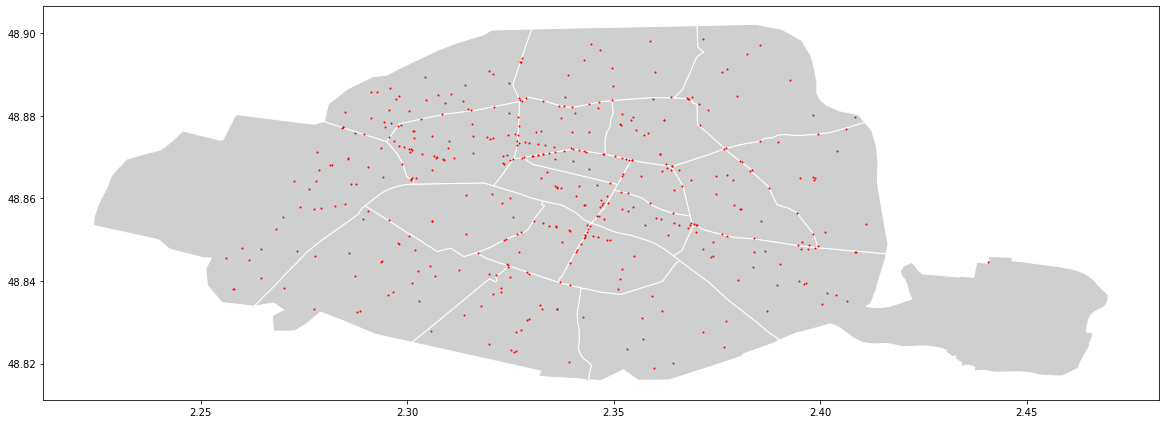

In [15]:
Paris = arrondissements.plot(color='#CFCFCF', edgecolor='#FFFFFF', figsize=(20,20))
Carte = kiosques.plot(ax=Paris, markersize=1, color='red', figsize=(20,20)) 
Carte

In [37]:
m = folium.Map(location=[48.85333, 2.3486], zoom_start=12)
tooltip = 'Click for more info'
#kioskIcon = folium.features.CustomIcon('Ressources/kiosk.ico', icon_size=(50,50))
for index, row in kiosques.iterrows():
    long, lat = row['geometry'].coords[:][0]
    folium.Marker([lat, long],
         tooltip=tooltip, 
         popup=row['adresse'],
         icon=folium.Icon(color='blue')).add_to(m)
m.save('kiosques.html')
m